<a href="https://colab.research.google.com/github/JoeyBarlia/Superstore-Analysis/blob/main/Superstore_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns





In [3]:
df = pd.read_csv('SuperStoreOrders.csv')
df.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2/1/2011,6/1/2011,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,3/1/2011,3/1/2011,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,3/1/2011,9/1/2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,3/1/2011,7/1/2011,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.0,253.320,81.26,High,2011


In [29]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


It seems that at some point, order_date was entered in a different format. dd/mm/yyyy to yyyy-mm-dd. Lets standardize.

In [4]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

 'Sales' is numeric and should not be an object.

In [8]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

Check for null values

In [14]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [15]:
df['sales'] = df['sales'].fillna(0)

Does every row correspond to a unique order ID?

In [9]:
df['order_id'].value_counts()

,count
order_id,
CA-2014-100111,14
MX-2014-166541,13
TO-2014-9950,13
NI-2014-8880,13
IN-2013-42311,13
...,...
PL-2013-7560,1
US-2013-144050,1
CA-2013-138933,1


No. Some repeat up to 14 times. Will keep this in mind.

###Feature Engineering

In [38]:
#year column
df['order_year'] = df['order_date'].dt.year


In [39]:
#month column
df['order_month'] = df['order_date'].dt.month

#Naming the months
m={1:"January",2:"Fabruary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

df['order_month']=[m[i] for i in df['order_month']]

In [41]:
#profit per sale. We will call it profit rate
df['profit_rate'] = df['profit']/df['sales']

In [48]:
#days to ship aka lead time
df['lead_time'] = df['ship_date'] - df['order_date']
df['lead_time'] = df['lead_time'].dt.days

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,profit,shipping_cost,order_priority,year,order_year,order_month,order_day,profit_rate,days_to_ship,lead_time
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,106.140,35.46,Medium,2011,2011,January,1,0.260147,151,151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,36.036,9.72,Medium,2011,2011,January,1,0.300300,212,212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,29.640,8.17,High,2011,2011,January,1,0.449091,120,120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,-26.055,4.82,High,2011,2011,January,1,-0.579000,120,120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,37.770,4.70,Medium,2011,2011,January,1,0.331316,212,212


#EDA

**Which is our most profitable category?**

In [61]:
aggregated_df = df.groupby('category', as_index=False)['profit'].sum()

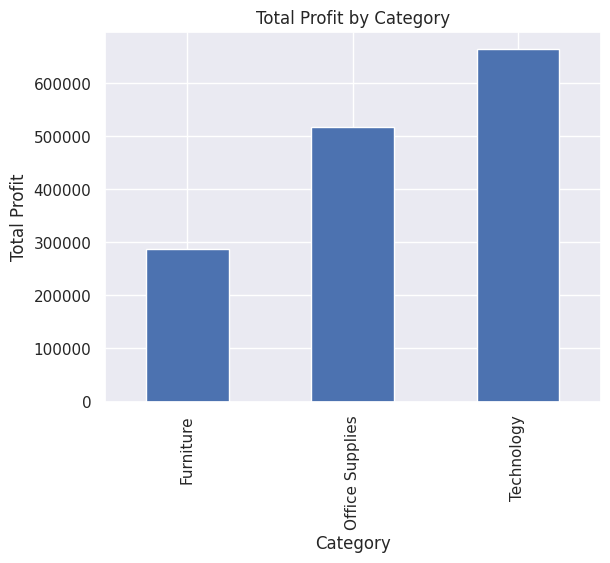

In [64]:
aggregated_df.plot(x='category', y='profit', kind='bar', title='Total Profit by Category', legend=False)
plt.ylabel('Total Profit')
plt.xlabel('Category')
plt.show()

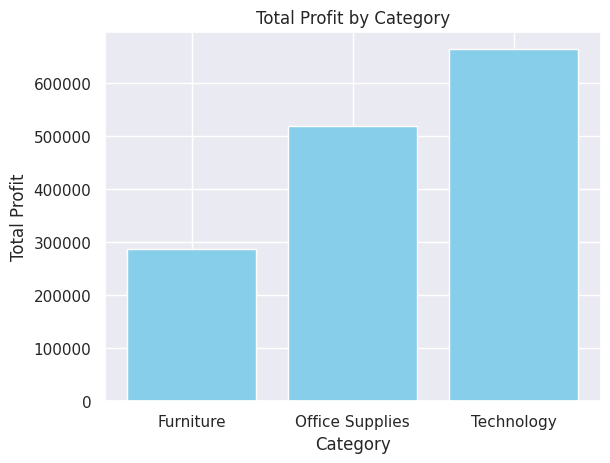

In [57]:
plt.bar(aggregated_df['category'], aggregated_df['profit'], color='skyblue')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

<ipython-input-58-937f9451769f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='profit', data=aggregated_df, palette='viridis')


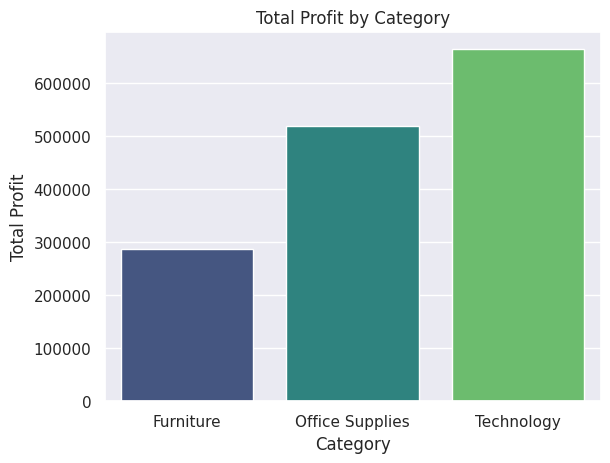

In [58]:
sns.barplot(x='category', y='profit', data=aggregated_df, palette='viridis')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

<ipython-input-68-0ecbc275c8f0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='market', y='profit', data=df, estimator=sum, ci=None, palette='coolwarm')
<ipython-input-68-0ecbc275c8f0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market', y='profit', data=df, estimator=sum, ci=None, palette='coolwarm')


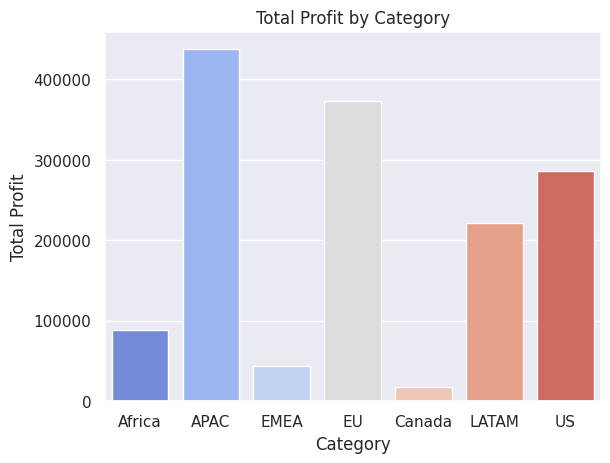

In [68]:
sns.barplot(x='market', y='profit', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

SPACERSPACERSPACER

In [54]:
max_profit_by_category=df.groupby(['category'])
max_profit_by_category=max_profit_by_category['profit'].max()
max_profit_by_category=pd.DataFrame(max_profit_by_category)
max_profit_by_category.reset_index(drop=False,inplace=True)
max_profit_by_category


,category,profit
0,Furniture,2316.510
1,Office Supplies,4946.370
2,Technology,8399.976


<Axes: xlabel='category', ylabel='profit'>

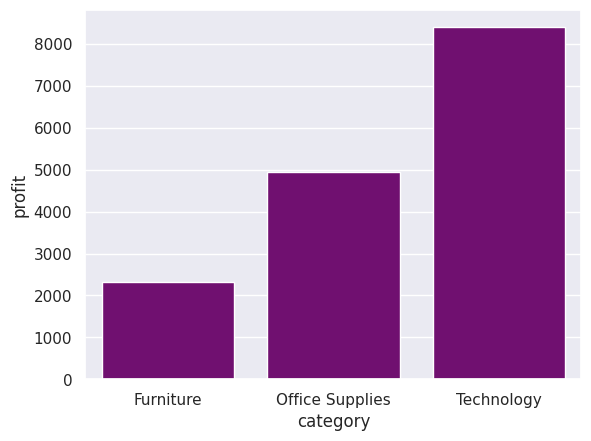

In [25]:
sns.barplot(x='category',y='profit', data=max_profit_by_category, color='purple')


**Which is our most profitable segment?**

<Axes: xlabel='segment', ylabel='count'>

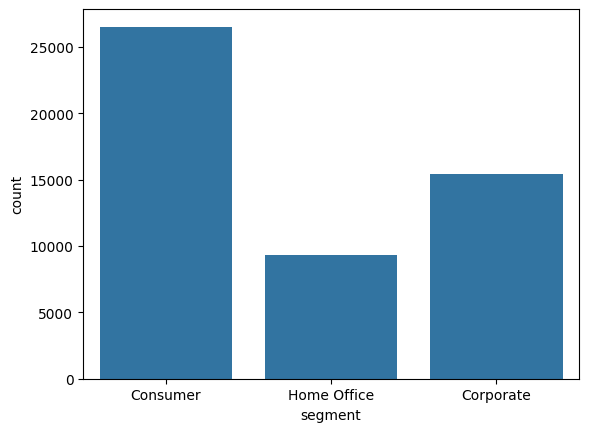

In [ ]:
sns.countplot(x=df['segment'])

**Which Region has the highest order count and In which region do we need to grow our Business?**

<Axes: xlabel='region', ylabel='count'>

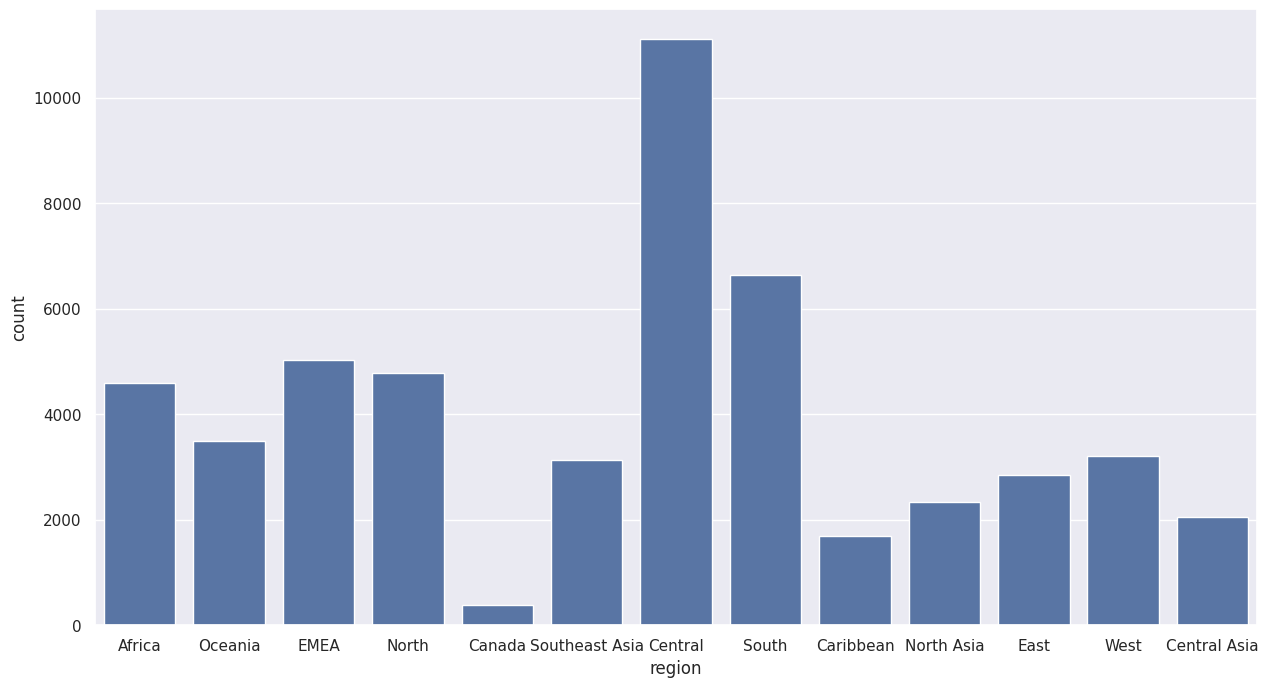

In [ ]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.countplot(x=df['region'])


In [ ]:
#what is central region?
df_region = df[df['region'].str.contains('Central region')]
df_region.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


**What are our top 10 most popular products?**

In [ ]:
top_sp=pd.DataFrame(df.groupby(['product_name']).sum()['quantity'])
top_sp.sort_values('quantity',ascending=False)[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


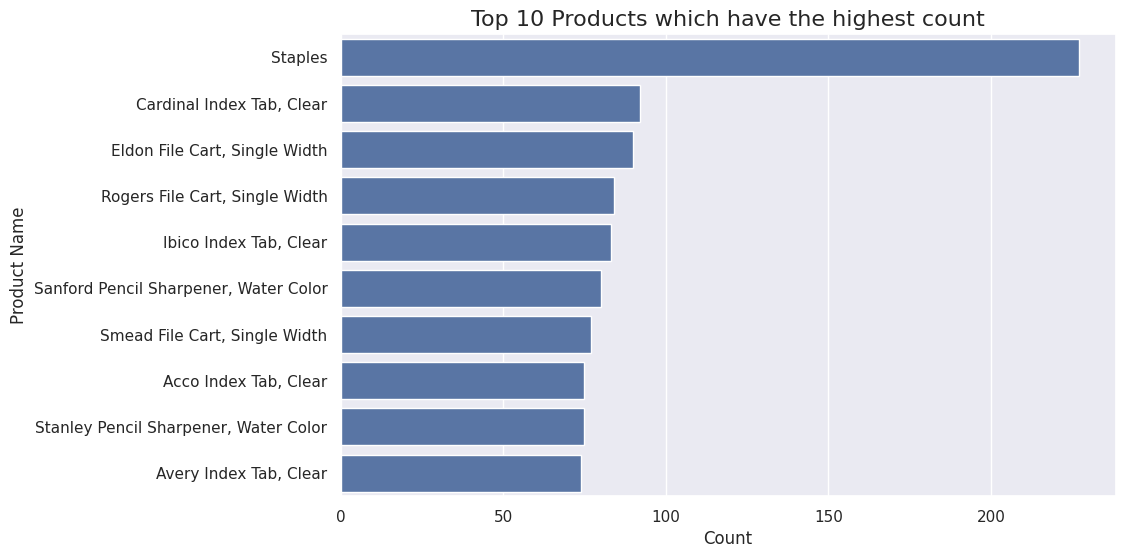

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(y='product_name', data=df, order=df['product_name'].value_counts().head(10).index)
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.show()

EDA into markets


In [ ]:
df['market'] == wvalue_counts()

,count
market,
APAC,11002
LATAM,10294
EU,10000
US,9994
EMEA,5029
Africa,4587
Canada,384


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], format='mixed', dayfirst=True)

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [ ]:
df['order_id'].value_counts()
#i want to see more

,count
order_id,
CA-2014-100111,14
MX-2014-166541,13
TO-2014-9950,13
NI-2014-8880,13
IN-2013-42311,13
...,...
PL-2013-7560,1
US-2013-144050,1
CA-2013-138933,1


In [ ]:
df['order_id'].duplicated().sum()


26255

In [ ]:
product_sum = df[['sales','product_name']].groupby('product_name').sum().sort_values('sales',ascending=False).head(20).reset_index()
product_mean = df[['sales','product_name']].groupby('product_name').mean().sort_values('sales',ascending=False).head(20).reset_index()

TypeError: agg function failed [how->mean,dtype->object]

NameError: name 'product_sum' is not defined

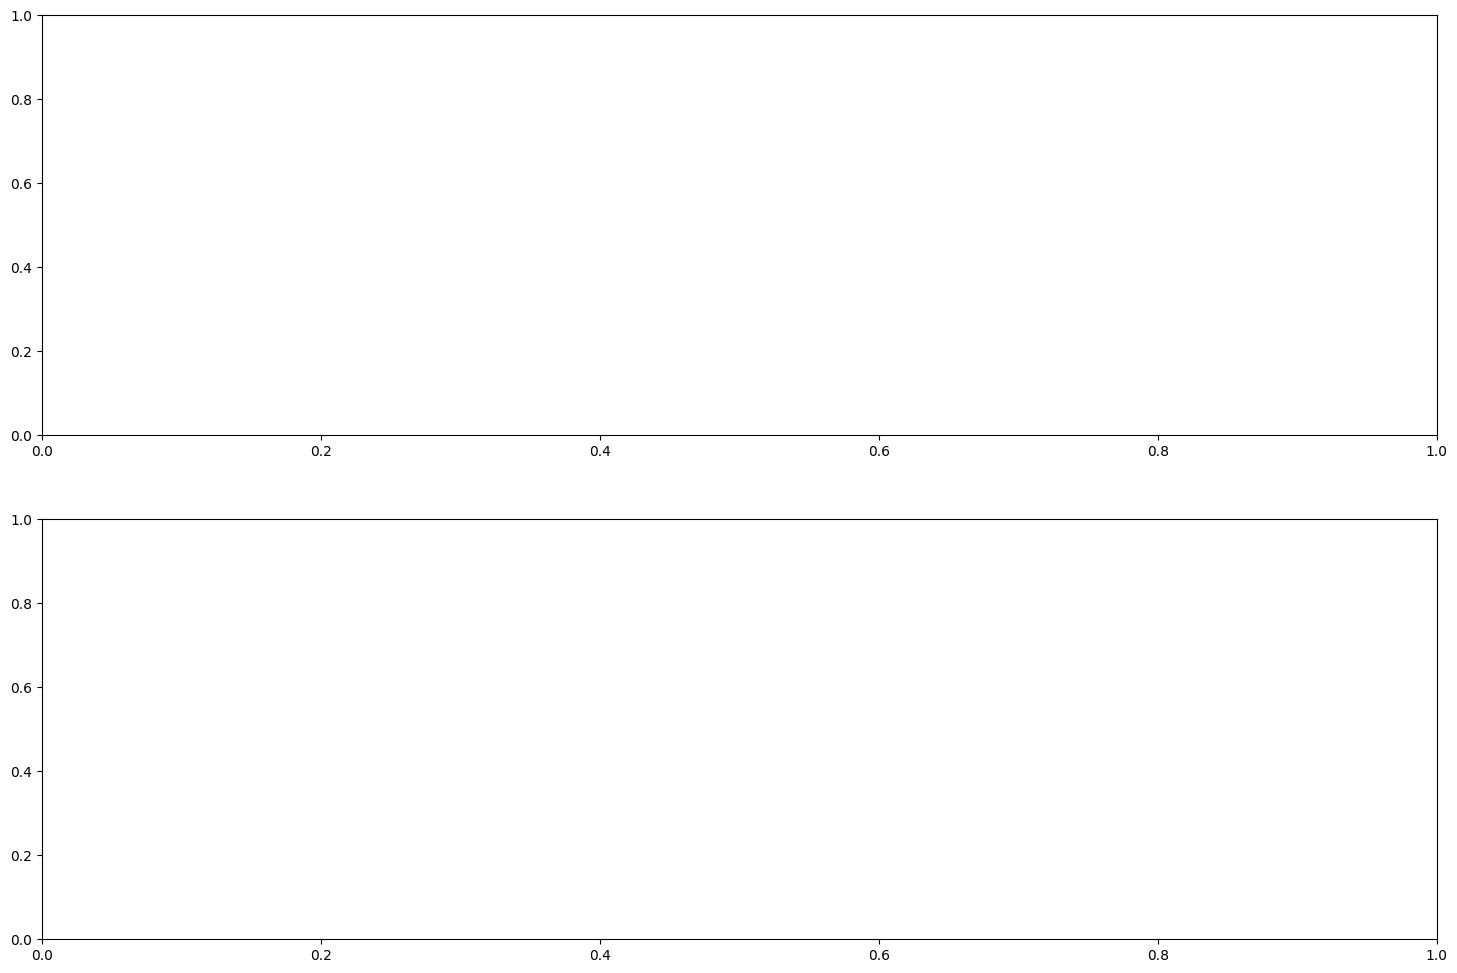

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(18,12))
sns.barplot(x=product_sum['sales'], y=product_sum['product_name'], ax=ax[0], palette=color, alpha=0.5)
ax[0].set_title('Top 20 product with the most sales', fontweight='bold', fontsize=16)
ax[0].tick_params(axis='y', labelsize=14)

sns.barplot(x=product_mean['sales'], y=product_mean['product_name'], ax=ax[1], palette=color, alpha=0.5)
ax[1].set_title('Top 20 product with average sales', fontweight='bold', fontsize=16)
ax[1].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()